#**The MNIST Dataset**


MNIST: *Modified National Institute of Standards and Technology*

In [35]:
28*28

784

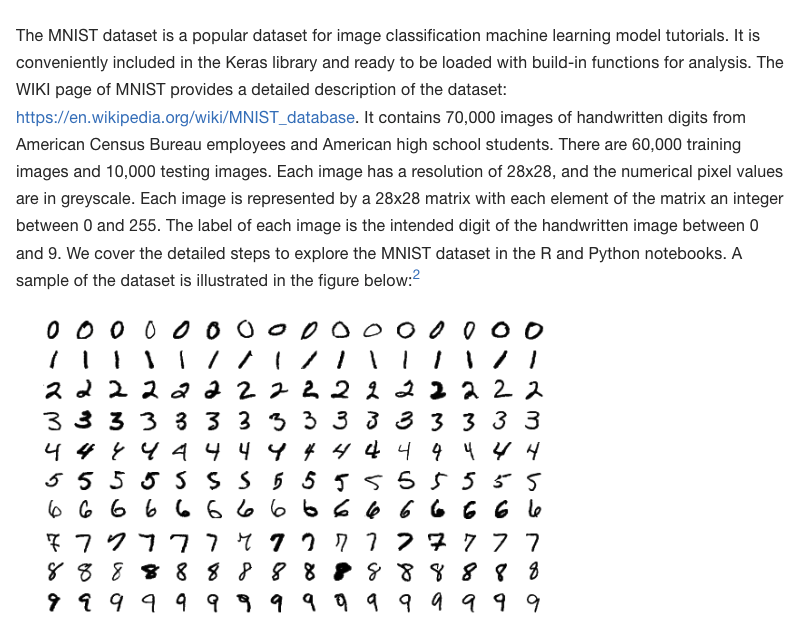

[link to the wiki page](https://en.wikipedia.org/wiki/MNIST_database)

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
import tensorflow
from tensorflow.keras.optimizers import Adam # - Works ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from keras.layers import Dense


In [37]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [38]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [39]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


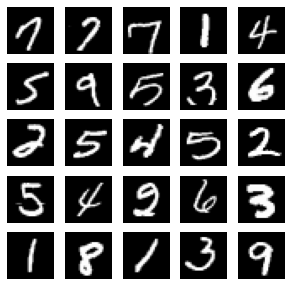

In [40]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
# plt.savefig("mnist-samples.png")
# plt.close('all')

In [41]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [42]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [43]:
x_train.shape

(60000, 28, 28)

In [44]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [45]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) #add -1 to match new reshape with original train data.
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [46]:
x_train.shape

(60000, 784)

In [47]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [48]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size,activation = 'relu'))
model.add(Dense(hidden_units,activation = 'relu'))
model.add(Dense(num_labels, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


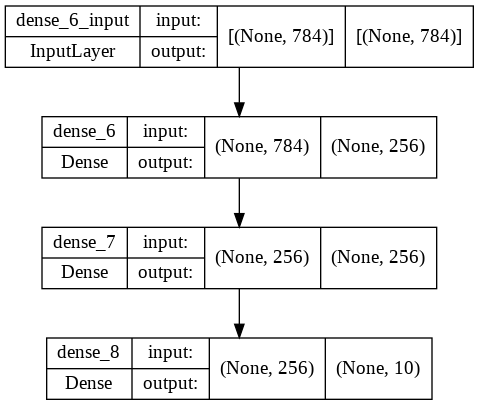

In [50]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [51]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 4s 11ms/step - loss: 0.3032 - accuracy: 0.9139 - val_loss: 0.1544 - val_accuracy: 0.9541
Epoch 2/20
329/329 [==============================] - 3s 9ms/step - loss: 0.1154 - accuracy: 0.9659 - val_loss: 0.1084 - val_accuracy: 0.9664
Epoch 3/20
329/329 [==============================] - 3s 10ms/step - loss: 0.0742 - accuracy: 0.9774 - val_loss: 0.1023 - val_accuracy: 0.9692
Epoch 4/20
329/329 [==============================] - 3s 11ms/step - loss: 0.0518 - accuracy: 0.9846 - val_loss: 0.0961 - val_accuracy: 0.9713
Epoch 5/20
329/329 [==============================] - 7s 20ms/step - loss: 0.0384 - accuracy: 0.9878 - val_loss: 0.1049 - val_accuracy: 0.9714
Epoch 6/20
329/329 [==============================] - 7s 21ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.1025 - val_accuracy: 0.9724
Epoch 7/20
329/329 [==============================] - 7s 20ms/step - loss: 0.0193 - accuracy: 0.9943 - val_loss: 0.1119 - val_accuracy: 0.9707


In [53]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1274 - accuracy: 0.9750

Test accuracy: 97.5%


In [54]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0498 - accuracy: 0.9900

Test accuracy: 99.0%


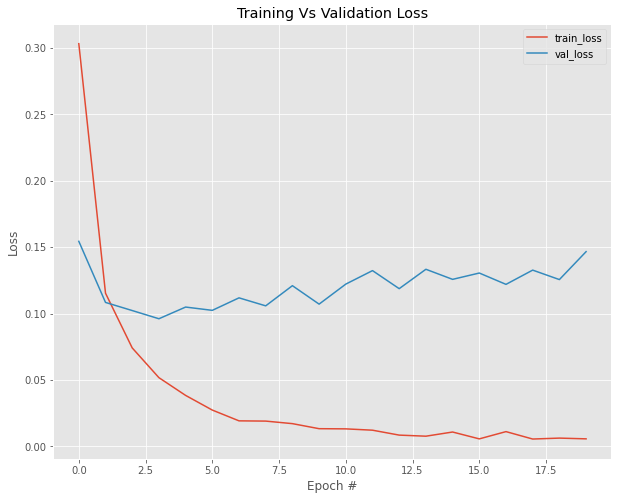

In [55]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding L2 Regualarisation

In [56]:
from keras.layers import Dense , Activation, Dropout
import keras


model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Activation('relu'))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 4s 12ms/step - loss: 0.5015 - accuracy: 0.9115 - val_loss: 0.3037 - val_accuracy: 0.9479
Epoch 2/20
329/329 [==============================] - 4s 12ms/step - loss: 0.2416 - accuracy: 0.9610 - val_loss: 0.2433 - val_accuracy: 0.9558
Epoch 3/20
329/329 [==============================] - 3s 11ms/step - loss: 0.1791 - accuracy: 0.9719 - val_loss: 0.1886 - val_accuracy: 0.9655
Epoch 4/20
329/329 [==============================] - 3s 10ms/step - loss: 0.1472 - accuracy: 0.9757 - val_loss: 0.1657 - val_accuracy: 0.9699
Epoch 5/20
329/329 [==============================] - 4s 11ms/step - loss: 0.1297 - accuracy: 0.9795 - val_loss: 0.1672 - val_accuracy: 0.9688
Epoch 6/20
329/329 [==============================] - 4s 12ms/step - loss: 0.1234 - accuracy: 0.9807 - val_loss: 0.1684 - val_accuracy: 0.9668
Epoch 7/20
329/329 [==============================] - 4s 11ms/step - loss: 0.1103 - accuracy: 0.9827 - val_loss: 0.1692 - val_accuracy: 0.9656

In [57]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1364 - accuracy: 0.9745

Test accuracy: 97.5%


In [58]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0939 - accuracy: 0.9858

Test accuracy: 98.6%


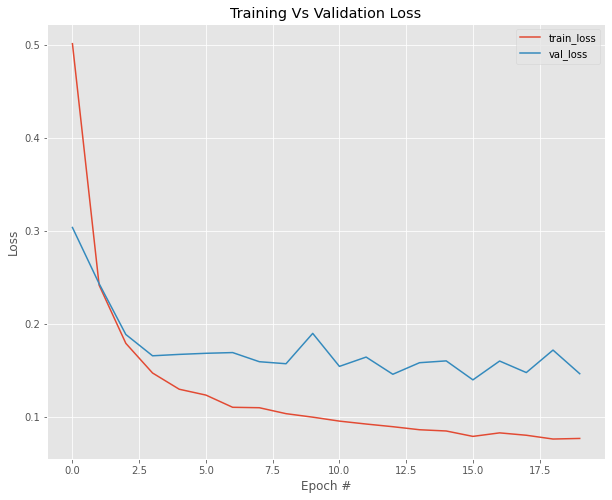

In [59]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Adding Dropout

In [60]:
from keras.layers import Dense , Activation, Dropout

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

Epoch 1/20
329/329 [==============================] - 5s 13ms/step - loss: 0.5085 - accuracy: 0.8427 - val_loss: 0.1866 - val_accuracy: 0.9442
Epoch 2/20
329/329 [==============================] - 3s 11ms/step - loss: 0.2252 - accuracy: 0.9328 - val_loss: 0.1401 - val_accuracy: 0.9573
Epoch 3/20
329/329 [==============================] - 3s 10ms/step - loss: 0.1755 - accuracy: 0.9474 - val_loss: 0.1150 - val_accuracy: 0.9659
Epoch 4/20
329/329 [==============================] - 3s 10ms/step - loss: 0.1457 - accuracy: 0.9560 - val_loss: 0.1015 - val_accuracy: 0.9692
Epoch 5/20
329/329 [==============================] - 3s 10ms/step - loss: 0.1252 - accuracy: 0.9611 - val_loss: 0.1090 - val_accuracy: 0.9691
Epoch 6/20
329/329 [==============================] - 3s 11ms/step - loss: 0.1153 - accuracy: 0.9630 - val_loss: 0.0986 - val_accuracy: 0.9705
Epoch 7/20
329/329 [==============================] - 3s 10ms/step - loss: 0.1028 - accuracy: 0.9679 - val_loss: 0.0921 - val_accuracy: 0.9724

In [61]:
loss, acc = model.evaluate(x_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9791

Test accuracy: 97.9%


In [62]:
loss, acc = model.evaluate(x_train, y_train)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0369 - accuracy: 0.9903

Test accuracy: 99.0%


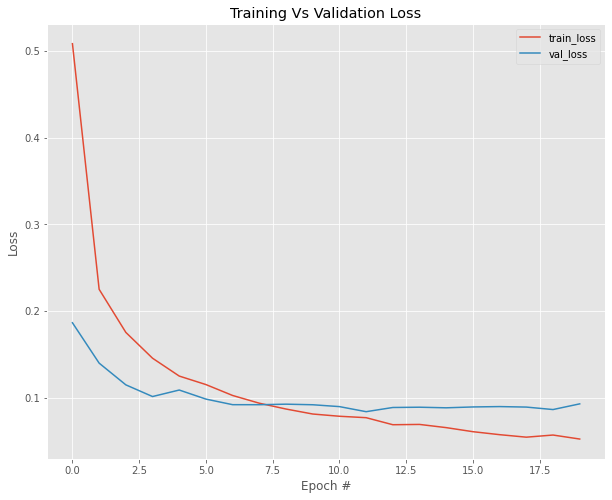

In [63]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()